<h1 style='color: green; font-size: 36px; font-weight: bold;'>Regressão Linear</h1>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dados = pd.read_csv('/content/WineQT.csv')

In [ ]:
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
dados.shape

(1143, 13)

In [ ]:
dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
dados.corr().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000,-0.251,0.673,0.172,0.108,-0.165,-0.111,0.682,-0.685,0.175,-0.075,0.122,-0.276
volatile acidity,-0.251,1.000,-0.544,-0.006,0.056,-0.002,0.078,0.017,0.221,-0.276,-0.204,-0.407,-0.008
citric acid,0.673,-0.544,1.000,0.176,0.245,-0.058,0.037,0.375,-0.546,0.331,0.106,0.241,-0.139
residual sugar,0.172,-0.006,0.176,1.000,0.071,0.165,0.191,0.380,-0.117,0.017,0.058,0.022,-0.046
chlorides,0.108,0.056,0.245,0.071,1.000,0.015,0.048,0.209,-0.278,0.375,-0.230,-0.124,-0.088
free sulfur dioxide,-0.165,-0.002,-0.058,0.165,0.015,1.000,0.661,-0.054,0.073,0.034,-0.047,-0.063,0.095
total sulfur dioxide,-0.111,0.078,0.037,0.191,0.048,0.661,1.000,0.050,-0.059,0.027,-0.188,-0.183,-0.107
density,0.682,0.017,0.375,0.380,0.209,-0.054,0.050,1.000,-0.353,0.143,-0.495,-0.175,-0.364
pH,-0.685,0.221,-0.546,-0.117,-0.278,0.073,-0.059,-0.353,1.000,-0.185,0.225,-0.052,0.133
sulphates,0.175,-0.276,0.331,0.017,0.375,0.034,0.027,0.143,-0.185,1.000,0.094,0.258,-0.104


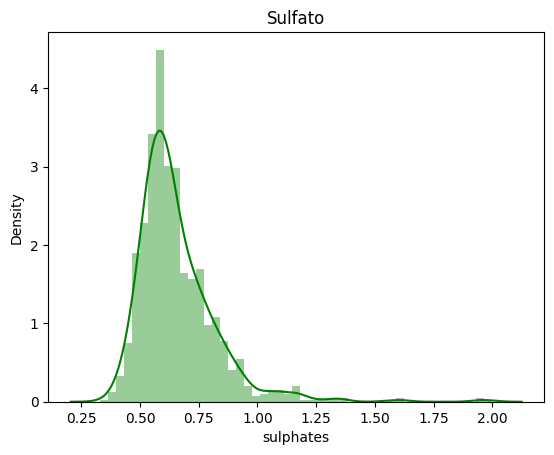

In [ ]:
sns.distplot(dados['sulphates'], color='green')
plt.title('Sulfato')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados['sulphates'] = scaler.fit_transform(dados['sulphates'].values.reshape(-1, 1))

dados.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,-0.573658,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.130881,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,-0.045254,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,-0.456235,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,-0.573658,9.4,5,4


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='sulphates', ylabel='Sulfato'>

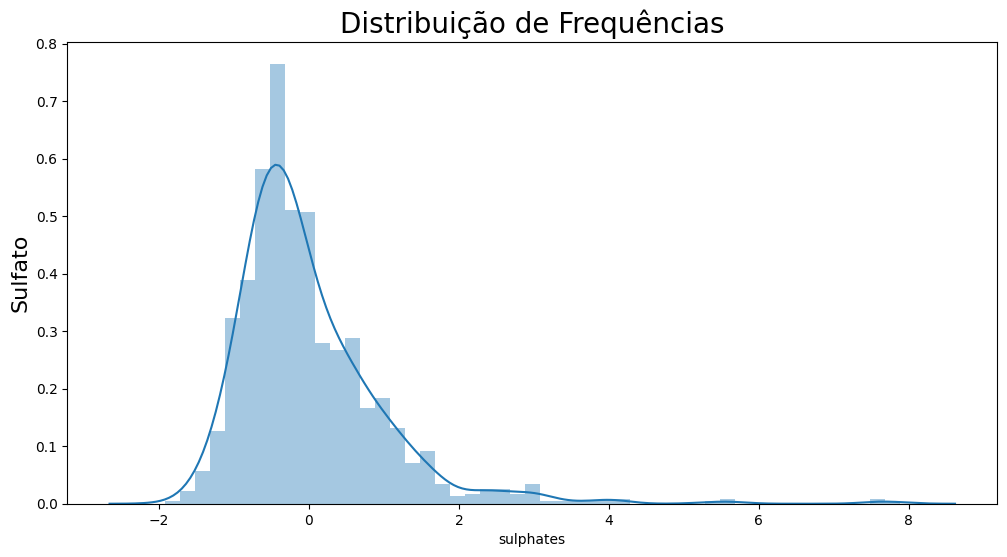

In [ ]:
ax = sns.distplot(dados['sulphates'])

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Sulfato', fontsize=16)

ax

In [ ]:
# ax = sns.pairplot(dados)

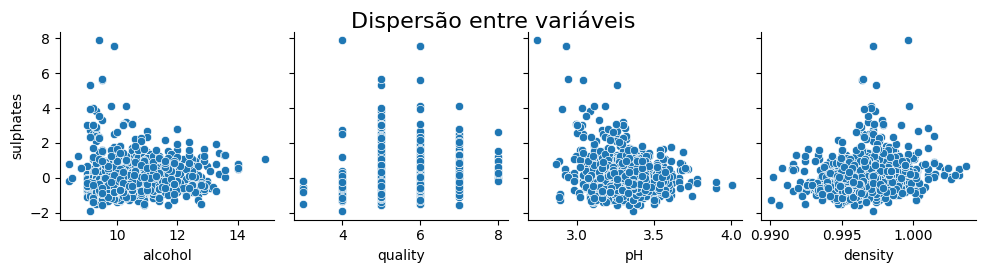

In [ ]:
ax = sns.pairplot(dados, y_vars='sulphates', x_vars=['alcohol', 'quality', 'pH', 'density'])
ax.fig.suptitle('Dispersão entre variáveis', fontsize=16, y=1.05)
ax

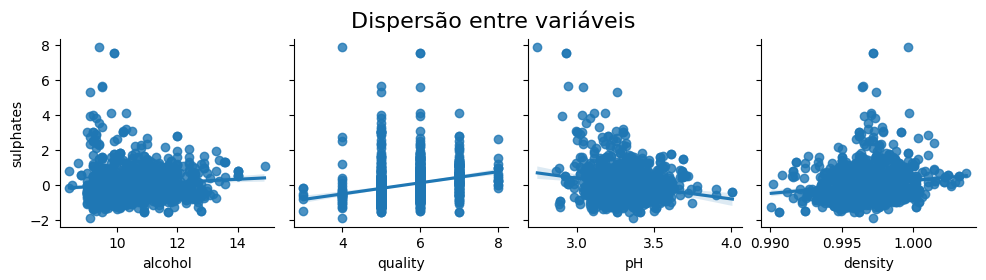

In [ ]:
ax = sns.pairplot(dados, y_vars='sulphates', x_vars=['alcohol', 'quality', 'pH', 'density'], kind='reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize=16, y=1.08)
ax

In [ ]:
y = dados['sulphates']
y

0      -0.573658
1       0.130881
2      -0.045254
3      -0.456235
4      -0.573658
          ...   
1138    0.541862
1139    0.952843
1140   -0.456235
1141    0.600574
1142    0.307016
Name: sulphates, Length: 1143, dtype: float64

In [ ]:
X = dados[['alcohol', 'quality', 'pH']]
X

,alcohol,quality,pH
0,9.4,5,3.51
1,9.8,5,3.20
2,9.8,5,3.26
3,9.8,6,3.16
4,9.4,5,3.51
...,...,...,...
1138,11.0,6,3.42
1139,9.5,6,3.42
1140,10.5,5,3.45
1141,11.2,6,3.52


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train

,alcohol,quality,pH
578,9.6,6,3.24
844,9.5,6,3.52
50,9.2,4,3.31
795,11.3,7,3.14
653,11.2,5,3.18
...,...,...,...
715,10.4,5,3.53
905,9.7,6,3.35
1096,11.7,7,3.42
235,11.0,5,3.13


In [ ]:
modelo = LinearRegression()

In [ ]:
from sklearn.impute import SimpleImputer
dados = SimpleImputer(strategy='mean')
X_train = dados.fit_transform(X_train)

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_previsto = modelo.predict(X_test)
y_previsto

array([-0.0624148 , -0.37226488,  0.31158871,  0.11085039,  0.03485918,
        0.9057525 , -0.13283453, -0.07936159,  0.10636347, -0.14243046,
        0.30199277, -0.19335001, -0.05993737, -0.35972905,  0.13004225,
        0.36513984,  0.00328565,  0.14513371, -0.24426957,  0.20843493,
       -0.40662415,  0.16161579, -0.01180356, -0.27708181, -0.24961093,
        0.40507059,  0.1188993 ,  0.38440766,  0.0322276 ,  0.11518316,
       -0.3417759 ,  0.30601723,  0.48779379, -0.18653982, -0.41219563,
        0.08446406, -0.73094906,  0.27978282, -0.25107976, -0.1122498 ,
        0.15735716,  0.11054208,  0.48787199, -0.17942132,  0.05699094,
        0.02402454,  0.06550232, -0.24984104, -0.1122498 , -0.84392888,
       -0.3197983 ,  0.15736122, -0.14660907, -0.16177648, -0.55651887,
       -0.28420032, -0.06133024, -0.19752862, -0.48896308, -0.2509256 ,
       -0.09158911,  0.13530542,  0.03942431,  0.09576118, -0.19683219,
       -0.27538063, -0.25804411,  0.05706914,  0.01025   , -0.71

In [ ]:
y_test

314     0.365727
698    -1.043350
846     0.776708
1136    0.952843
1097   -0.397523
          ...   
708    -0.632369
509    -0.514946
791    -0.749793
655     1.422536
299    -0.573658
Name: sulphates, Length: 343, dtype: float64

In [ ]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.09


In [ ]:
X_test[0:1]

,alcohol,quality,pH
314,11.2,5,3.22


In [ ]:
entrada = X_test[0:1]
entrada

,alcohol,quality,pH
314,11.2,5,3.22


In [ ]:
modelo.predict(entrada)[0].round(3)

-0.062

In [ ]:
alcohol=5
quality=30
pH=0
entrada=[[alcohol, quality, pH]]

print(f'{modelo.predict(entrada)[0]:.2f} litros')

11.13 litros


In [ ]:
modelo.intercept_

2.3109296511067523

In [ ]:
type(modelo.intercept_)

numpy.float64

In [ ]:
modelo.coef_

array([ 0.0139287 ,  0.29151042, -1.23816707])

In [ ]:
type(modelo.coef_)

numpy.ndarray

<Axes: title={'center': 'Previsão x Real'}, xlabel='Consumo de Vinho (litros) - Previsão', ylabel='Consumo de Vinho (litros) - Real'>

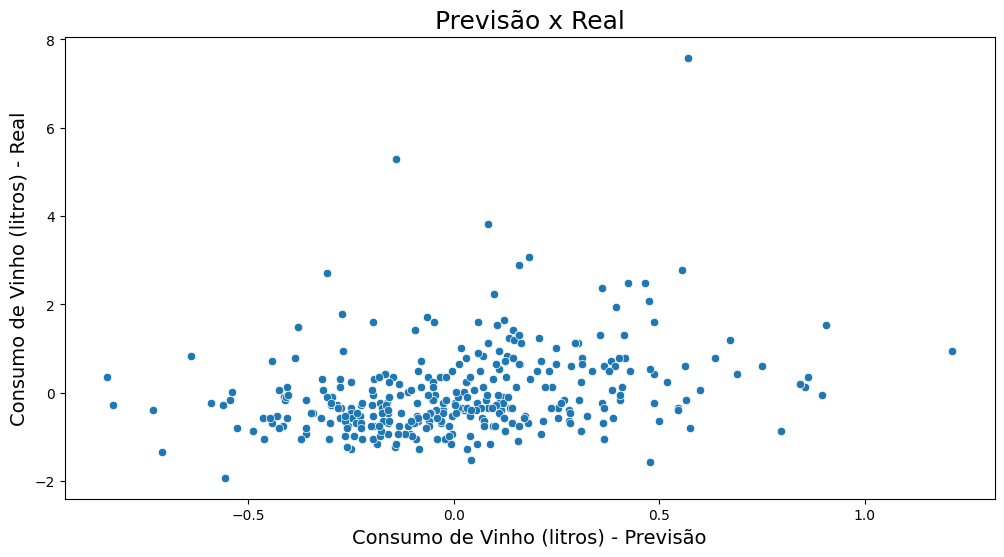

In [ ]:
ax = sns.scatterplot(x=y_previsto, y=y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Consumo de Vinho (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Vinho (litros) - Real', fontsize=14)
ax

In [ ]:
X2 = dados[['alcohol', 'quality', 'pH']]
X2

,alcohol,quality,pH
0,9.4,5,3.51
1,9.8,5,3.20
2,9.8,5,3.26
3,9.8,6,3.16
4,9.4,5,3.51
...,...,...,...
1138,11.0,6,3.42
1139,9.5,6,3.42
1140,10.5,5,3.45
1141,11.2,6,3.52


In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [ ]:
modelo_2 = LinearRegression()

In [ ]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
print('Modelo com Temp. Média')
print(f'R² = {modelo_2.score(X2_train, y2_train).round(2)}')

Modelo com Temp. Média
R² = 0.11


In [ ]:
print('Modelo com Temp. Máxima')
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

Modelo com Temp. Máxima
R² = 0.1


In [ ]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [ ]:
print('Modelo com Temp. Média')
print(f'R² = {metrics.r2_score(y2_test, y_previsto_2).round(2)}')

Modelo com Temp. Média
R² = 0.06


In [ ]:
print('Modelo com Temp. Máxima')
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

Modelo com Temp. Máxima
R² = 0.09


In [ ]:
MSE_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
RMSE_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([MSE_2, RMSE_2, R2_2], ['MSE', 'RMSE', 'R²'], columns=['Métricas'])

,Métricas
MSE,0.79
RMSE,0.89
R²,0.06


In [ ]:
MSE = metrics.mean_squared_error(y_test, y_previsto).round(2)
MSE

0.89

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
RMSE

0.94

In [ ]:
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([MSE, RMSE, R2], ['MSE', 'RMSE', 'R²'], columns=['Métricas'])

,Métricas
MSE,0.89
RMSE,0.94
R²,0.09
